In [33]:
import jams
import os
import json
import matplotlib.pyplot as plt
% matplotlib inline

In [34]:
def dir_to_score(ref_dir, est_dir):
    # ref_dir and est_dir need to contain all 8 jams files of the test-set
    jams_list = [f for f in os.listdir(est_dir) if f.split('.')[1] == 'jams']
    ref_list = [f for f in os.listdir(ref_dir) if f.split('.')[1] == 'jams']
    jams_list.sort()
    ref_list.sort()
    
    # combine and collect all annotations in big_est and big_ref
    big_est = jams.Annotation('pitch_midi')
    big_ref = jams.Annotation('pitch_midi')
    big_est.duration = 0
    big_ref.duration = 0
    for e,r in zip(jams_list, ref_list):
        est_jams = jams.load(os.path.join(est_dir, e))
        ref_jams = jams.load(os.path.join(ref_dir, r))
        # print(e,r)
        for i in range(6):
            est_ann = est_jams.search(namespace='pitch_midi')[i]
            ref_ann = ref_jams.search(namespace='pitch_midi')[i]
            t_offset = i * est_ann.duration + big_est.duration
            big_est.duration += est_ann.duration
            big_ref.duration += ref_ann.duration
            for obs in est_ann:
                big_est.append(time=obs.time + t_offset, duration=obs.duration, value=obs.value)
            for obs in ref_ann:
                big_ref.append(time=obs.time + t_offset, duration=obs.duration, value=obs.value)
                
    scores = jams.eval.transcription(big_ref, big_est)
    return scores


def get_dir_list(dir_path):
    dir_list = [os.path.join(dir_path, d) for d in os.listdir(dir_path) 
                if os.path.isdir(os.path.join(dir_path, d))]
    return dir_list


In [35]:
est_base_dir = '/Users/tom/Music/DataSet/test-set_mira_search2/'
ref_dir = '/Users/tom/Music/DataSet/test-set_man'
est_dir_list = get_dir_list(est_base_dir)

output = []
len_todo = len(est_dir_list)
for est_dir in est_dir_list:
    print(est_dir, len_todo)
    s = dir_to_score(ref_dir, est_dir)
    param_path = os.path.join(est_dir, 'param.json')
    if os.path.isfile(param_path):
        with open(param_path, 'r') as stream:
            param = json.load(stream)
        output.append([s, param])
    else:
        print('no param.json')
    len_todo -= 1

('/Users/tom/Music/DataSet/test-set_mira_search2/XVFZ', 40)


('/Users/tom/Music/DataSet/test-set_mira_search2/75S2', 39)


('/Users/tom/Music/DataSet/test-set_mira_search2/W117', 38)


('/Users/tom/Music/DataSet/test-set_mira_search2/RAR7', 37)


('/Users/tom/Music/DataSet/test-set_mira_search2/XDIK', 36)


('/Users/tom/Music/DataSet/test-set_mira_search2/6H8Z', 35)


('/Users/tom/Music/DataSet/test-set_mira_search2/9FZE', 34)


('/Users/tom/Music/DataSet/test-set_mira_search2/18ND', 33)


('/Users/tom/Music/DataSet/test-set_mira_search2/0YFR', 32)


('/Users/tom/Music/DataSet/test-set_mira_search2/RNSH', 31)


('/Users/tom/Music/DataSet/test-set_mira_search2/UROP', 30)


('/Users/tom/Music/DataSet/test-set_mira_search2/8JMM', 29)


('/Users/tom/Music/DataSet/test-set_mira_search2/6W58', 28)


('/Users/tom/Music/DataSet/test-set_mira_search2/RCFS', 27)


('/Users/tom/Music/DataSet/test-set_mira_search2/9F7P', 26)


('/Users/tom/Music/DataSet/test-set_mira_search2/RVJK', 25)


('/Users/tom/Music/DataSet/test-set_mira_search2/I2BZ', 24)


('/Users/tom/Music/DataSet/test-set_mira_search2/UA22', 23)


('/Users/tom/Music/DataSet/test-set_mira_search2/9WBB', 22)


('/Users/tom/Music/DataSet/test-set_mira_search2/263P', 21)


('/Users/tom/Music/DataSet/test-set_mira_search2/BISW', 20)


('/Users/tom/Music/DataSet/test-set_mira_search2/ATVG', 19)


('/Users/tom/Music/DataSet/test-set_mira_search2/335G', 18)


('/Users/tom/Music/DataSet/test-set_mira_search2/OTAS', 17)


('/Users/tom/Music/DataSet/test-set_mira_search2/D10R', 16)


('/Users/tom/Music/DataSet/test-set_mira_search2/Z9FN', 15)


('/Users/tom/Music/DataSet/test-set_mira_search2/26XW', 14)


('/Users/tom/Music/DataSet/test-set_mira_search2/WXHJ', 13)


('/Users/tom/Music/DataSet/test-set_mira_search2/64TY', 12)


('/Users/tom/Music/DataSet/test-set_mira_search2/2ANM', 11)


('/Users/tom/Music/DataSet/test-set_mira_search2/H2QU', 10)


('/Users/tom/Music/DataSet/test-set_mira_search2/5VGV', 9)


('/Users/tom/Music/DataSet/test-set_mira_search2/4E87', 8)


('/Users/tom/Music/DataSet/test-set_mira_search2/L8SJ', 7)


('/Users/tom/Music/DataSet/test-set_mira_search2/VOBO', 6)


('/Users/tom/Music/DataSet/test-set_mira_search2/NUSQ', 5)


('/Users/tom/Music/DataSet/test-set_mira_search2/343W', 4)


('/Users/tom/Music/DataSet/test-set_mira_search2/9NWW', 3)


('/Users/tom/Music/DataSet/test-set_mira_search2/GKB4', 2)


('/Users/tom/Music/DataSet/test-set_mira_search2/I1CH', 1)
no param.json


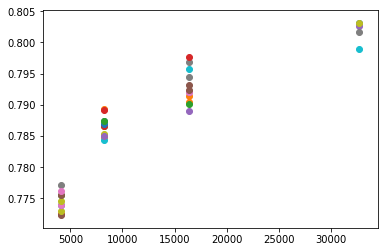

In [36]:
plt.figure()
for pair in output:
    scores = pair[0]
    param = pair[1]
    plt.scatter(param['nfft'], scores['F-measure_no_offset'])
plt.show()

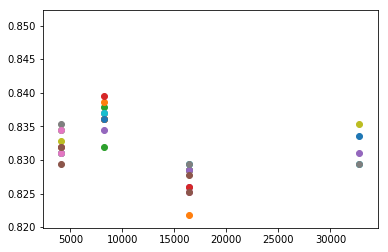

In [37]:
plt.figure()
for pair in output:
    scores = pair[0]
    param = pair[1]
    plt.scatter(param['nfft'], scores['Recall_no_offset'])
plt.show()


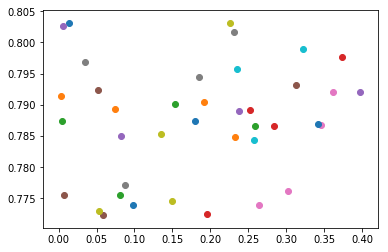

In [41]:
plt.figure()
for pair in output:
    scores = pair[0]
    param = pair[1]
    plt.scatter(param['minimal_interference'], scores['F-measure_no_offset'])
plt.show()


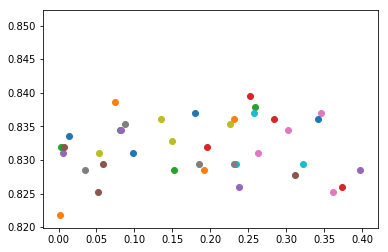

In [42]:
plt.figure()
for pair in output:
    scores = pair[0]
    param = pair[1]
    plt.scatter(param['minimal_interference'], scores['Recall_no_offset'])
plt.show()


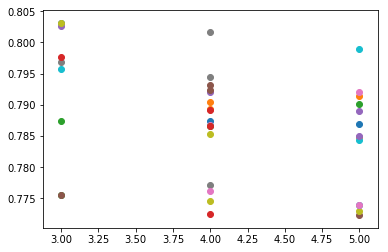

In [43]:
plt.figure()
for pair in output:
    scores = pair[0]
    param = pair[1]
    plt.scatter(param['n_iter'], scores['F-measure_no_offset'])
plt.show()

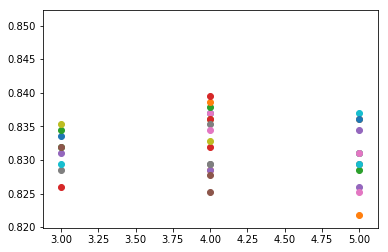

In [44]:
plt.figure()
for pair in output:
    scores = pair[0]
    param = pair[1]
    plt.scatter(param['n_iter'], scores['Recall_no_offset'])
plt.show()

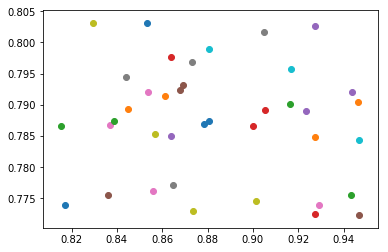

In [45]:
plt.figure()
for pair in output:
    scores = pair[0]
    param = pair[1]
    plt.scatter(param['overlap'], scores['F-measure_no_offset'])
plt.show()

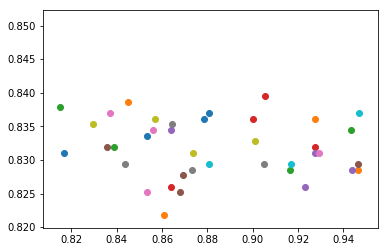

In [46]:
plt.figure()
for pair in output:
    scores = pair[0]
    param = pair[1]
    plt.scatter(param['overlap'], scores['Recall_no_offset'])
plt.show()